In [869]:
import pandas as pd
import numpy as np
from scipy.stats import (
    norm,
    skew,
    levene,
    ttest_rel,
    ttest_ind,
    wilcoxon,
    chi2_contingency,
    fisher_exact, mannwhitneyu
)
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import warnings


warnings.simplefilter("ignore")

### 0. Read and clean dataset
#### 0a. Read and describe
Required fields:
number of cigarettes 2000 and 2005, economic strain, self-rated health, education 2000 and 2005

In [870]:
df = pd.read_stata("Stat_25.dta")
df.head(10)

,id,gender,age_00,height_00,weight_00,born_sweden,born_Sweden_parents,marital_status_00,education2gr_00,selfrated_health_00,...,smoking_05,number_cig_05,sleepingproblems_05,physical_activity_05,economic_strain_05,emotional_support_05,practical_support_05,social_participation_05,passive_smoking_05,mental_health_05
0,76.0,male,51.0,182.0,98.0,yes,both,Divorced,more than 12 years,Fair,...,yes,21.0,no,Low,no,"Yes, maybe","Yes, maybe",low,no,no
1,176.0,female,58.0,169.0,83.0,yes,both,Married/partner,more than 12 years,Good,...,no,NaN,no,High,no,"Yes, sure","Yes, sure",high,no,no
2,196.0,female,77.0,162.0,75.0,NaN,NaN,NaN,NaN,Good,...,yes,4.0,no,Sedentary,no,"Yes, maybe","Yes, sure",high,NaN,no
3,226.0,female,33.0,169.0,59.0,yes,both,Married/partner,up to 12 years,Very good,...,yes,5.0,no,Low,no,"Yes, sure","Yes, sure",high,no,no
4,231.0,female,42.0,172.0,64.0,yes,both,Married/partner,up to 12 years,Good,...,no,NaN,no,Low,no,"Yes, sure","Yes, sure",high,at work,NaN
5,327.0,male,56.0,183.0,86.0,no,none,Single,more than 12 years,Very good,...,yes,12.0,no,Moderate,no,"Yes, sure","Yes, sure",high,no,NaN
6,619.0,female,46.0,161.0,60.0,yes,one,Married/partner,up to 12 years,Fair,...,yes,12.0,yes,Low,no,"No, not sure","Yes, sure",high,NaN,yes
7,696.0,female,27.0,172.0,80.0,no,none,Married/partner,up to 12 years,Fair,...,no,NaN,no,Sedentary,yes,"Yes, sure","Yes, sure",high,no,no
8,728.0,female,34.0,167.0,63.0,yes,both,Married/partner,up to 12 years,Very good,...,no,NaN,no,Low,no,"Yes, maybe","Yes, sure",high,no,no
9,901.0,female,78.0,166.0,75.0,yes,both,Married/partner,up to 12 years,Fair,...,no,NaN,no,NaN,yes,"Yes, maybe","Yes, maybe",high,no,no


In [871]:
df.describe()

,id,age_00,height_00,weight_00,number_sickdays_00,number_cig_00,weight_05,number_sickdays_05,number_cig_05
count,262.000000,262.000000,262.000000,255.000000,213.000000,55.000000,255.000000,60.000000,55.000000
mean,6791.603053,48.435115,171.854962,74.737255,8.460094,13.854545,75.537255,29.166667,12.218182
std,3798.791775,15.921069,9.155215,13.996821,26.185200,8.492738,15.728178,75.520828,9.204852
min,76.000000,18.000000,150.000000,48.000000,0.000000,0.000000,43.000000,1.000000,0.000000
25%,3723.750000,35.250000,164.000000,65.000000,0.000000,8.000000,64.000000,3.000000,5.000000
50%,6542.000000,50.000000,172.000000,74.000000,0.000000,14.000000,74.000000,5.000000,12.000000
75%,9522.500000,61.000000,179.000000,83.000000,5.000000,18.000000,84.500000,11.750000,16.000000
max,15011.000000,79.000000,194.000000,130.000000,220.000000,40.000000,165.000000,365.000000,40.000000


In [872]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            262 non-null    float64 
 1   gender                        262 non-null    category
 2   age_00                        262 non-null    float64 
 3   height_00                     262 non-null    float64 
 4   weight_00                     255 non-null    float64 
 5   born_sweden                   260 non-null    category
 6   born_Sweden_parents           259 non-null    category
 7   marital_status_00             260 non-null    category
 8   education2gr_00               253 non-null    category
 9   selfrated_health_00           261 non-null    category
 10  stress_life_00                262 non-null    category
 11  physical_activity_00          258 non-null    category
 12  sleepingproblems_00           260 non-null    cate

In [873]:
df.memory_usage().sum()

33502

#### 0b. Clean up dataset

In [874]:
columns_to_drop = ["born_Sweden_parents", "born_sweden", "marital_status_00", "marital_status_05", "stress_life_00", "stress_life_05", "physical_activity_00", "physical_activity_05", "sleepingproblems_00", "sleepingproblems_05", "emotional_support_00", "practical_support_00", "emotional_support_05", "practical_support_05", "sickdays_00", "sickdays_05", "mental_health_05", "mental_health_00", "alcohol_risky_00", "long_term_disease_00", "passive_smoking_05", "passive_smoking_00", "social_participation_05", "social_participation_00"]

df.drop(columns=columns_to_drop, inplace=True)
df.memory_usage().sum()

23422

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            262 non-null    float64 
 1   gender                        262 non-null    category
 2   age_00                        262 non-null    float64 
 3   height_00                     262 non-null    float64 
 4   weight_00                     255 non-null    float64 
 5   education2gr_00               253 non-null    category
 6   selfrated_health_00           261 non-null    category
 7   economic_strain_00            257 non-null    category
 8   economic_strain_childhood_00  253 non-null    category
 9   number_sickdays_00            213 non-null    float64 
 10  smoking_00                    262 non-null    category
 11  number_cig_00                 55 non-null     float64 
 12  jobstrain_00                  158 non-null    cate

In [876]:
df.isnull().sum()

id                                0
gender                            0
age_00                            0
height_00                         0
weight_00                         7
education2gr_00                   9
selfrated_health_00               1
economic_strain_00                5
economic_strain_childhood_00      9
number_sickdays_00               49
smoking_00                        0
number_cig_00                   207
jobstrain_00                    104
weight_05                         7
education2gr_05                   0
selfrated_health_05               1
number_sickdays_05              202
smoking_05                        0
number_cig_05                   207
economic_strain_05                0
dtype: int64

In [877]:
df

,id,gender,age_00,height_00,weight_00,education2gr_00,selfrated_health_00,economic_strain_00,economic_strain_childhood_00,number_sickdays_00,smoking_00,number_cig_00,jobstrain_00,weight_05,education2gr_05,selfrated_health_05,number_sickdays_05,smoking_05,number_cig_05,economic_strain_05
0,76.0,male,51.0,182.0,98.0,more than 12 years,Fair,no,sometimes,30.0,yes,22.0,low,112.0,more than 12 years,Fair,365.0,yes,21.0,no
1,176.0,female,58.0,169.0,83.0,more than 12 years,Good,no,NaN,31.0,no,NaN,low,85.0,more than 12 years,Very good,4.0,no,NaN,no
2,196.0,female,77.0,162.0,75.0,NaN,Good,no,yes,0.0,yes,10.0,NaN,72.0,up to 12 years,Fair,NaN,yes,4.0,no
3,226.0,female,33.0,169.0,59.0,up to 12 years,Very good,no,no,5.0,yes,9.0,low,59.0,up to 12 years,Good,NaN,yes,5.0,no
4,231.0,female,42.0,172.0,64.0,up to 12 years,Good,no,sometimes,0.0,no,NaN,high,70.0,up to 12 years,Very good,2.0,no,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,13676.0,female,35.0,161.0,78.0,up to 12 years,Very good,no,no,6.0,yes,22.0,high,85.0,more than 12 years,Good,3.0,yes,24.0,no
258,13779.0,female,33.0,172.0,80.0,up to 12 years,Fair,yes,sometimes,0.0,no,NaN,NaN,70.0,up to 12 years,Good,4.0,no,NaN,no
259,13883.0,female,43.0,172.0,68.0,more than 12 years,Good,yes,no,0.0,yes,17.0,low,66.0,more than 12 years,Good,14.0,yes,28.0,yes
260,13918.0,male,67.0,172.0,75.0,up to 12 years,Fair,no,no,0.0,no,NaN,NaN,72.0,up to 12 years,Fair,NaN,no,NaN,no


In [878]:
weight_00_mean = df["weight_00"].dropna().mean()
weight_05_mean = df["weight_05"].dropna().mean()

df["weight_00"] = df["weight_00"].fillna(weight_00_mean)
df["weight_05"] = df["weight_05"].fillna(weight_05_mean)
df["selfrated_health_00"] = df["selfrated_health_00"].fillna("Good")
df["selfrated_health_05"] = df["selfrated_health_05"].fillna("Good")

In [879]:
df.isnull().sum()

id                                0
gender                            0
age_00                            0
height_00                         0
weight_00                         0
education2gr_00                   9
selfrated_health_00               0
economic_strain_00                5
economic_strain_childhood_00      9
number_sickdays_00               49
smoking_00                        0
number_cig_00                   207
jobstrain_00                    104
weight_05                         0
education2gr_05                   0
selfrated_health_05               0
number_sickdays_05              202
smoking_05                        0
number_cig_05                   207
economic_strain_05                0
dtype: int64

In [880]:
df_cl = df.dropna(subset=["economic_strain_00", "education2gr_00"])
df_cl

,id,gender,age_00,height_00,weight_00,education2gr_00,selfrated_health_00,economic_strain_00,economic_strain_childhood_00,number_sickdays_00,smoking_00,number_cig_00,jobstrain_00,weight_05,education2gr_05,selfrated_health_05,number_sickdays_05,smoking_05,number_cig_05,economic_strain_05
0,76.0,male,51.0,182.0,98.0,more than 12 years,Fair,no,sometimes,30.0,yes,22.0,low,112.0,more than 12 years,Fair,365.0,yes,21.0,no
1,176.0,female,58.0,169.0,83.0,more than 12 years,Good,no,NaN,31.0,no,NaN,low,85.0,more than 12 years,Very good,4.0,no,NaN,no
3,226.0,female,33.0,169.0,59.0,up to 12 years,Very good,no,no,5.0,yes,9.0,low,59.0,up to 12 years,Good,NaN,yes,5.0,no
4,231.0,female,42.0,172.0,64.0,up to 12 years,Good,no,sometimes,0.0,no,NaN,high,70.0,up to 12 years,Very good,2.0,no,NaN,no
5,327.0,male,56.0,183.0,86.0,more than 12 years,Very good,no,no,NaN,yes,13.0,NaN,84.0,more than 12 years,Good,NaN,yes,12.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,13676.0,female,35.0,161.0,78.0,up to 12 years,Very good,no,no,6.0,yes,22.0,high,85.0,more than 12 years,Good,3.0,yes,24.0,no
258,13779.0,female,33.0,172.0,80.0,up to 12 years,Fair,yes,sometimes,0.0,no,NaN,NaN,70.0,up to 12 years,Good,4.0,no,NaN,no
259,13883.0,female,43.0,172.0,68.0,more than 12 years,Good,yes,no,0.0,yes,17.0,low,66.0,more than 12 years,Good,14.0,yes,28.0,yes
260,13918.0,male,67.0,172.0,75.0,up to 12 years,Fair,no,no,0.0,no,NaN,NaN,72.0,up to 12 years,Fair,NaN,no,NaN,no


### 1. Use a test to examine if there is a difference in the number of cigarettes people smoked between 2000 and 2005. 
1a. Which test is suitable? Show and interpret the results. (2p)<br>
1b. What are the null/ alternative hypotheses? (1p)<br>
1c. What are the assumptions for this test? Check the assumptions and explain. (2p)<br>
1d. If you used a parametric or non-parametric test in Q1a, use the other now and compare the results. (2p)<br>
1e. What are the null and alternative hypotheses for this test? (1p)<br>
1f. How would you report the results from those different tests? (2p)<br>


1a. Which test is suitable? Show and interpret the results.<br>
A paired t-test is the most suitable test here. This test is designed to compare the means of two related samples. Since we have measurements on the same people in 2000 and 2005 (before and after), the samples are dependent (paired). Confirmed by comparison of individuals id in 2000 and 2005.<br>
1b. What are the null/ alternative hypotheses?<br>
- H0: There is no difference in the mean number of cigarettes smoked by individuals between 2000 and 2005. <i>μ_00 == μ_05</i><br>
- H1:  There is a difference in the mean number of cigarettes smoked by individuals between 2000 and 2005. <i>μ_00 != μ_05</i><br> 

1c. What are the assumptions for this test? Check the assumptions and explain. <i>Normality, Equality of variance, Independency</i><br>
- Calculated skewness for both groups confirm that they fit for normal distribution.<br>
- p-value of Levene's test is significantly larger than chosen alpha 0.05. That's mean we have similar groups<br>
- Both groups are dependent <br>

1d. If you used a parametric or non-parametric test in Q1a, use the other now and compare the results.<br>
Wilcoxon signed-rank test. This is the non-parametric alternative to the paired t-test. It doesn't assume a normal distribution for the differences and works on the ranked differences.<br>

1e. What are the null and alternative hypotheses for this test? <br>
- H0: There is no difference in the mean number of cigarettes smoked by individuals between 2000 and 2005. <i>μ_00 == μ_05</i><br>
- H1:  There is a difference in the mean number of cigarettes smoked by individuals between 2000 and 2005. <i>μ_00 != μ_05</i><br>

1f. How would you report the results from those different tests?<br>
A paired t-test was conducted to assess the change in cigarette consumption between 2000 and 2005 along with non-parametric Wilcoxon signed-rank test. The results showed that there was no statistically significant difference in cigarette consumption between 2000 and 2005 (mean = 14.2 in 2000 and mean = 12.7 in 2005), with a t-statistic of t = 1.55, and p = 0.13 (alpha level was considered to be 0.05). The results of Wilcoxon test also indicated that there was no statistically significant difference between two years, with a test statistic of W = 457.5, and p = 0.053.<br>
Both the parametric and non-parametric tests yield similar conclusions (both failing to reject H0), this adds robustness to our findings.

In [881]:
num_cig_00 = df_cl["number_cig_00"].dropna()
num_cig_05 = df_cl["number_cig_05"].dropna()

In [882]:
num_cig_00

0      22.0
3       9.0
5      13.0
6      16.0
18      9.0
19      0.0
24      6.0
26     10.0
38     21.0
53      0.0
64     21.0
65      7.0
66     18.0
73     15.0
82     16.0
83     21.0
84      5.0
90     17.0
94     40.0
104     5.0
107    15.0
113    22.0
116    34.0
128    13.0
131    20.0
138    12.0
139    15.0
140     6.0
144     7.0
153    16.0
154     8.0
157    15.0
163     7.0
166    18.0
167    26.0
173    15.0
183    36.0
192     9.0
194    20.0
197     2.0
204    24.0
205    14.0
209    13.0
212     2.0
216    11.0
220     8.0
227    10.0
229     0.0
231    15.0
255    14.0
257    22.0
259    17.0
Name: number_cig_00, dtype: float64

In [883]:
num_cig_05

0      21.0
3       5.0
5      12.0
6      12.0
18      8.0
19     12.0
24      0.0
26      0.0
38     15.0
53      2.0
64     23.0
65      5.0
66     11.0
73     14.0
82     15.0
83     15.0
84      1.0
90     16.0
94     26.0
104     2.0
107     8.0
113    18.0
116    40.0
128     4.0
131    18.0
138     4.0
139    16.0
140    19.0
144     1.0
153    15.0
154     7.0
157    14.0
163     2.0
166    15.0
167    40.0
173    22.0
183     6.0
192     6.0
194    20.0
197     0.0
204    16.0
205    16.0
209    10.0
212     0.0
216    12.0
220    10.0
227    12.0
229     5.0
231    21.0
255    15.0
257    24.0
259    28.0
Name: number_cig_05, dtype: float64

In [884]:
ids_00 = df_cl[["id", "number_cig_00"]].dropna(subset=["number_cig_00"]).id.astype("int")
ids_05 = df_cl[["id", "number_cig_05"]].dropna(subset=["number_cig_05"]).id.astype("int")


In [885]:
ids_00 == ids_05

0      True
3      True
5      True
6      True
18     True
19     True
24     True
26     True
38     True
53     True
64     True
65     True
66     True
73     True
82     True
83     True
84     True
90     True
94     True
104    True
107    True
113    True
116    True
128    True
131    True
138    True
139    True
140    True
144    True
153    True
154    True
157    True
163    True
166    True
167    True
173    True
183    True
192    True
194    True
197    True
204    True
205    True
209    True
212    True
216    True
220    True
227    True
229    True
231    True
255    True
257    True
259    True
Name: id, dtype: bool

In [886]:
num_cig_00.describe()

count    52.000000
mean     14.173077
std       8.619907
min       0.000000
25%       8.000000
50%      14.500000
75%      18.500000
max      40.000000
Name: number_cig_00, dtype: float64

In [887]:
num_cig_05.describe()

count    52.000000
mean     12.673077
std       9.251860
min       0.000000
25%       5.000000
50%      12.000000
75%      16.500000
max      40.000000
Name: number_cig_05, dtype: float64

In [888]:
num_cig_00.index == num_cig_05.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [889]:
def draw_norm_distribution(data1 ,data2, labels, **kwargs):
    data2_mean = data2.mean()
    data2_sd = data2.std()
    data2_min = data2.min()
    data2_max = data2.max()

    data1_mean = data1.mean()
    data1_sd = data1.std()
    data1_min = data1.min()
    data1_max = data1.max()
    
    x_2 = np.linspace(data2_min, data2_max, 100)
    p_2 = norm.pdf(x_2, data2_mean, data2_sd)
    
    x_1 = np.linspace(data1_min, data1_max, 100)
    p_1 = norm.pdf(x_1, data1_mean, data1_sd)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    sns.histplot(data1, bins=20, kde=False, color="skyblue", stat="density", label=labels[0], ax=axes[0])
    sns.histplot(data2, kde=False, bins=20, color="green", stat="density", label=labels[1], ax=axes[1])
    axes[0].plot(x_1, p_1, 'r', linewidth=2, label="Normal Distribution")
    axes[1].plot(x_2, p_2, 'r', linewidth=2, label="Normal Distribution")
    
    for ax in axes:
        ax.spines["bottom"].set_color("black")
        ax.spines["left"].set_color("black")
        ax.legend()
        ax.grid(False)
        if "ax_labels" in kwargs:
            ax.set_ylabel(kwargs.get("ax_labels")[0])
            ax.set_xlabel(kwargs.get("ax_labels")[1])
        
    if "title" in kwargs:
        axes[0].set_title(kwargs.get("title"))
        axes[1].set_title(kwargs.get("title"))
        
    plt.show()

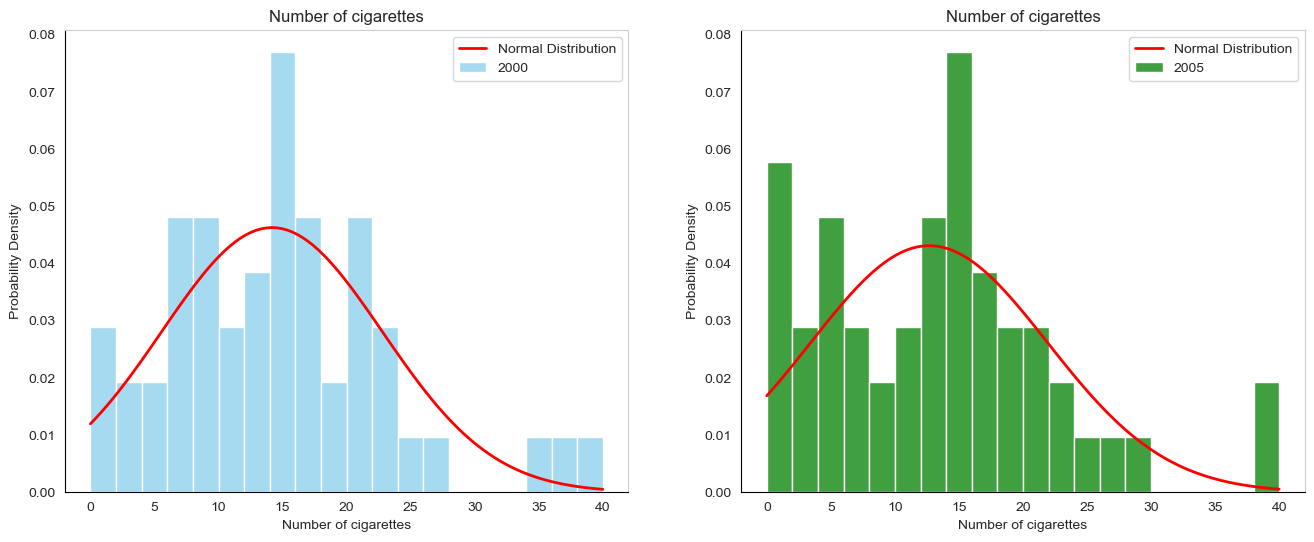

In [890]:
draw_norm_distribution(num_cig_00, num_cig_05, ["2000", "2005"], title="Number of cigarettes", ax_labels=["Probability Density", "Number of cigarettes"])

In [891]:
res = levene(num_cig_00, num_cig_05, center="mean")
res

LeveneResult(statistic=0.3271833007327587, pvalue=0.5685808740213332)

In [892]:
skew_00 = skew(num_cig_00)
skew_05 = skew(num_cig_05)

In [893]:
print(skew_00, skew_05)

0.7425612000097354 0.8455952560063972


Calculated skewness for both groups confirm that they fit for normal distribution.<br>
p-value of Levene's test is significantly larger than chosen alpha 0.05. That's mean we have similar groups

In [894]:
num_cig_t_results = pg.ttest(num_cig_00, num_cig_05, correction=True)
num_cig_t_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.8554,101.493653,two-sided,0.394345,"[-1.98, 4.98]",0.167758,0.287,0.135438


In [895]:
t_statistic, p_value = ttest_rel(num_cig_00, num_cig_05)
print(t_statistic, p_value)

1.5502068769220916 0.1272757690881698


In [896]:
from scipy.stats import wilcoxon

statistic, p_value = wilcoxon(x=num_cig_00, y=num_cig_05)
print(f"Wilcoxon signed-rank test statistic: {statistic:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in cigarette consumption between 2000 and 2005.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in cigarette consumption between 2000 and 2005.")


Wilcoxon signed-rank test statistic: 457.500
P-value: 0.053
Fail to reject the null hypothesis: There is no statistically significant difference in cigarette consumption between 2000 and 2005.


### Q.2 
2a. Which test is appropriate to use to investigate whether there is a significant difference between the groups with/without economic strain who smoked in 2005 in how many cigarettes they smoked. Show and interpret the results.<br>
2b. What are the null and alternative hypotheses?<br>
2c. What assumptions are required to be able to use this test? Check the assumptions and explain. <br>
2d. If you used a parametric or non-parametric test in Q2a, use the other now and compare the results.<br>
2e. What are the null and alternative hypotheses for this test? <br>
2f. How would you report the results from those different tests? <br>


<b>2a. Show and interpret the results.</b><br>
The fields for analysis: smoking_05, number_cig_05 and economic_strain_05. Replace missing values in number_cig_05 with 0.0 since the smoking status of the individual is "no".
 smoking_05 and economic_strain_05 are categorical (Nominal) variable and the number_cig_05 is Numerical (Discrete).A Chi2-test for the categorical outcome and an independent t-test for the number of cigarettes. <br> 
<b>2b. What are the null and alternative hypotheses?</b> <br>
- (H0): There is no association between smoking and economic strain.<br>
- (H1): There is an association between smoking and economic strain.<br>

<b>2c. What assumptions are required to be able to use this test? Check the assumptions and explain.</b><br>
- The sample observations should be independent. Our variables are independent <br>
- Equality of variance. The assumption of equality of variances was met. The p-value was 0.999, which is more than chosen alpha of 0.05.<br>
- Normality of distribution (valid for number_cig_05 variable)<br> The distribution is normal. The distribution for num of cigarettes associated with economic strain and not associated equal to 0.78 and 1.10 respectively.<br>

<b>2e. What are the null and alternative hypotheses for this test?</b><br>
- (H0): There is no association between number of cigarettes and economic strain.<br>
- (H1): There is an association between number of cigarettes and economic strain.<br>

<b>2f. How would you report the results from those different tests?</b> <br>
The conducted tests showed that, for the selected significance level (alpha=0.05), there is insufficient evidence to reject the null hypothesis both for categorical data (smoking and economic strain) and for numerical data (the number of cigarettes smoked among smokers with and without economic strain).<br> 


In [897]:
df_cl


,id,gender,age_00,height_00,weight_00,education2gr_00,selfrated_health_00,economic_strain_00,economic_strain_childhood_00,number_sickdays_00,smoking_00,number_cig_00,jobstrain_00,weight_05,education2gr_05,selfrated_health_05,number_sickdays_05,smoking_05,number_cig_05,economic_strain_05
0,76.0,male,51.0,182.0,98.0,more than 12 years,Fair,no,sometimes,30.0,yes,22.0,low,112.0,more than 12 years,Fair,365.0,yes,21.0,no
1,176.0,female,58.0,169.0,83.0,more than 12 years,Good,no,NaN,31.0,no,NaN,low,85.0,more than 12 years,Very good,4.0,no,NaN,no
3,226.0,female,33.0,169.0,59.0,up to 12 years,Very good,no,no,5.0,yes,9.0,low,59.0,up to 12 years,Good,NaN,yes,5.0,no
4,231.0,female,42.0,172.0,64.0,up to 12 years,Good,no,sometimes,0.0,no,NaN,high,70.0,up to 12 years,Very good,2.0,no,NaN,no
5,327.0,male,56.0,183.0,86.0,more than 12 years,Very good,no,no,NaN,yes,13.0,NaN,84.0,more than 12 years,Good,NaN,yes,12.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,13676.0,female,35.0,161.0,78.0,up to 12 years,Very good,no,no,6.0,yes,22.0,high,85.0,more than 12 years,Good,3.0,yes,24.0,no
258,13779.0,female,33.0,172.0,80.0,up to 12 years,Fair,yes,sometimes,0.0,no,NaN,NaN,70.0,up to 12 years,Good,4.0,no,NaN,no
259,13883.0,female,43.0,172.0,68.0,more than 12 years,Good,yes,no,0.0,yes,17.0,low,66.0,more than 12 years,Good,14.0,yes,28.0,yes
260,13918.0,male,67.0,172.0,75.0,up to 12 years,Fair,no,no,0.0,no,NaN,NaN,72.0,up to 12 years,Fair,NaN,no,NaN,no


In [898]:
# df_cl_2 = df_cl[df_cl["smoking_05"] == "yes"].iloc[:, -3:]
df_cl_2 = df_cl.iloc[:, -3:]
# df_cl_2.number_cig_05.fillna(0.0, inplace=True)  # since smoking status is "no"
df_cl_2["number_cig_05_log"] = np.log(df_cl_2["number_cig_05"])
df_cl_2

,smoking_05,number_cig_05,economic_strain_05,number_cig_05_log
0,yes,21.0,no,3.044522
1,no,NaN,no,NaN
3,yes,5.0,no,1.609438
4,no,NaN,no,NaN
5,yes,12.0,no,2.484907
...,...,...,...,...
257,yes,24.0,no,3.178054
258,no,NaN,no,NaN
259,yes,28.0,yes,3.332205
260,no,NaN,no,NaN


In [899]:
tab = pd.crosstab(df_cl_2['economic_strain_05'], df_cl_2['smoking_05'],
            rownames=['Strain'], colnames=['Smoking'])
tab

Smoking,no,yes
Strain,,
no,158,31
yes,44,17


In [900]:
chi2, p, dof, expected = chi2_contingency(tab)

# Print results
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 3.204380376562246
p-value: 0.07344132222087205
Degrees of Freedom: 1
Expected Frequencies:
 [[152.712  36.288]
 [ 49.288  11.712]]


In [901]:
tab1 = pd.crosstab(df_cl_2['economic_strain_05'], df_cl_2['smoking_05'],
                  rownames=['Strain'], colnames=['Smoking'])
tab1['Total'] = tab1.sum(axis=1)
tab1.loc['Total'] = tab1.sum(axis=0)
tab1

Smoking,no,yes,Total
Strain,,,
no,158,31,189
yes,44,17,61
Total,202,48,250


In [902]:
df_cl_smokers = df_cl_2[df_cl_2["smoking_05"] == "yes"]
econ_smokers = df_cl_smokers[df_cl_smokers["economic_strain_05"] == "yes"]
nonecon_smokers = df_cl_smokers[df_cl_smokers["economic_strain_05"] == "no"]

In [903]:
econ_smokers_log = df_cl_smokers[df_cl_smokers["economic_strain_05"] == "yes"].number_cig_05_log
nonecon_smokers_log = df_cl_smokers[df_cl_smokers["economic_strain_05"] == "no"].number_cig_05_log


#### Check with parametric tests

In [904]:
econ_smokers.number_cig_05

19     12.0
53      2.0
66     11.0
83     15.0
94     26.0
107     8.0
113    18.0
131    18.0
138     4.0
139    16.0
140    19.0
167    40.0
173    22.0
204    16.0
227    12.0
255    15.0
259    28.0
Name: number_cig_05, dtype: float64

In [905]:
nonecon_smokers.number_cig_05

0      21.0
3       5.0
5      12.0
6      12.0
18      8.0
38     15.0
64     23.0
65      5.0
73     14.0
82     15.0
84      1.0
90     16.0
104     2.0
116    40.0
128     4.0
144     1.0
153    15.0
154     7.0
157    14.0
163     2.0
166    15.0
183     6.0
192     6.0
194    20.0
205    16.0
209    10.0
216    12.0
220    10.0
229     5.0
231    21.0
257    24.0
Name: number_cig_05, dtype: float64

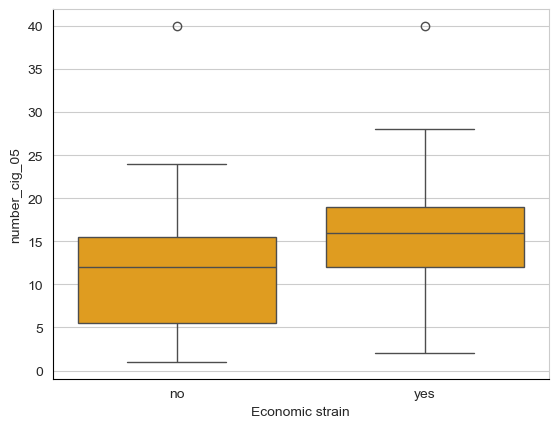

In [906]:
combined_data_ = [*nonecon_smokers.number_cig_05, *econ_smokers.number_cig_05]
labels_ = ['no'] * len(nonecon_smokers.number_cig_05) + ['yes'] * len(econ_smokers.number_cig_05)

# Create the boxplot
ax_ = sns.boxplot(x=labels_, y=combined_data_, color="orange")
ax_.spines.bottom.set_color("black")
ax_.spines.left.set_color("black")
ax_.set_xlabel("Economic strain")
ax_.set_ylabel("number_cig_05")
plt.show()

In [907]:
nonecon_smokers.describe()

,number_cig_05,number_cig_05_log
count,31.000000,31.000000
mean,12.161290,2.193947
std,8.414657,0.908979
min,1.000000,0.000000
25%,5.500000,1.700599
50%,12.000000,2.484907
75%,15.500000,2.740319
max,40.000000,3.688879


In [908]:
econ_smokers.describe()

,number_cig_05,number_cig_05_log
count,17.000000,17.000000
mean,16.588235,2.622546
std,9.117694,0.716111
min,2.000000,0.693147
25%,12.000000,2.484907
50%,16.000000,2.772589
75%,19.000000,2.944439
max,40.000000,3.688879


In [909]:
res_econ_lev = levene(nonecon_smokers.number_cig_05, econ_smokers.number_cig_05)
res_econ_lev

LeveneResult(statistic=1.1940211725911518e-06, pvalue=0.9991328666753599)

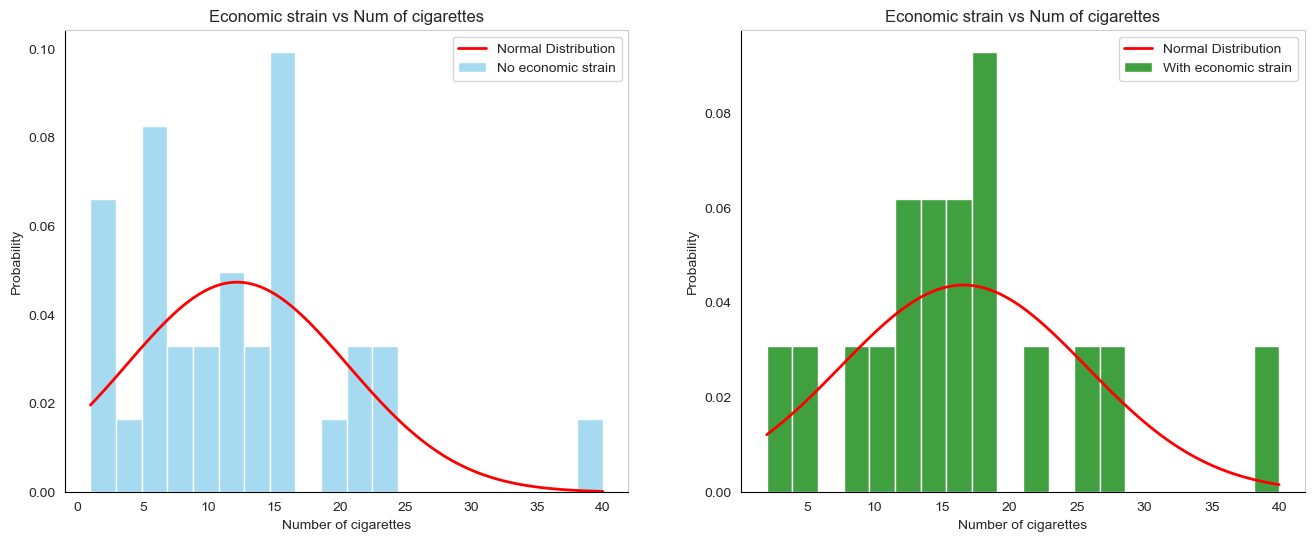

In [910]:
draw_norm_distribution(
    nonecon_smokers.number_cig_05,
    econ_smokers.number_cig_05,
    ["No economic strain", "With economic strain"],
    title="Economic strain vs Num of cigarettes",
    ax_labels=["Probability", "Number of cigarettes"]
)

In [911]:
num_cig_yes_sk = skew(econ_smokers.number_cig_05)
num_cig_no_sk = skew(nonecon_smokers.number_cig_05)
print(num_cig_yes_sk, num_cig_no_sk)

0.7837549090639307 1.1013059616110223


In [912]:
res_t, p_value_t = ttest_ind(econ_smokers.number_cig_05, nonecon_smokers.number_cig_05)
print(res_t, p_value_t)

1.6927272991468334 0.0972707792945297


#### Check with non-parametric tests

In [913]:
res_mw = mannwhitneyu(nonecon_smokers.number_cig_05, econ_smokers.number_cig_05)
res_mw

MannwhitneyuResult(statistic=179.5, pvalue=0.07122750694777125)

### 3.Q

3a. Use a test to see if there is an association between self-rated health (make a new binary variable) and education in 2005. Interpret the result. (2p)<br>
3b. What are the null and alternative hypotheses? (1p)<br>
3c. What assumptions are required to be able to use this test? (1p)<br>
3d. Make a table one for the study in this question and report the descriptive statistics stratified by the groups you are comparing in this study. Make a proper table with appropriate summary measures. (3p)<br>
3e. Calculate the relative risk for a smoker to report poor self-rated health and interpret the estimate. (1p)<br>
3f. Calculate the odds ratio for a smoker to report poor self-rated health and interpret the estimate. (1p)<br>
3g. Which estimate do you report and why?(1p)<br>


Self rated health is an outcome and level of education is the exposure<br>
<b>3a. Use a test to see if there is an association between self-rated health (make a new binary variable) and education in 2005. Interpret the result.</b><br>
Self rated health is an outcome and level of education is the exposure. We have both categorical variables. Therefore, a non-parametric tests must be conducted - Chi-square test or Fisher’s exact test<br>

<b>3b. What are the null and alternative hypotheses? (1p)</b><br>
- H0: There is no association between education and Self rated health in 2005.<br>
- H1: There is an association between education and Self rated health in 2005.<br>

<b>3c. What assumptions are required to be able to use this test? (1p)</b><br>
- Independency between groups. The sample observations should be independent.
-  The number of observations should be > 40 in total.

In [914]:
df_cl

,id,gender,age_00,height_00,weight_00,education2gr_00,selfrated_health_00,economic_strain_00,economic_strain_childhood_00,number_sickdays_00,smoking_00,number_cig_00,jobstrain_00,weight_05,education2gr_05,selfrated_health_05,number_sickdays_05,smoking_05,number_cig_05,economic_strain_05
0,76.0,male,51.0,182.0,98.0,more than 12 years,Fair,no,sometimes,30.0,yes,22.0,low,112.0,more than 12 years,Fair,365.0,yes,21.0,no
1,176.0,female,58.0,169.0,83.0,more than 12 years,Good,no,NaN,31.0,no,NaN,low,85.0,more than 12 years,Very good,4.0,no,NaN,no
3,226.0,female,33.0,169.0,59.0,up to 12 years,Very good,no,no,5.0,yes,9.0,low,59.0,up to 12 years,Good,NaN,yes,5.0,no
4,231.0,female,42.0,172.0,64.0,up to 12 years,Good,no,sometimes,0.0,no,NaN,high,70.0,up to 12 years,Very good,2.0,no,NaN,no
5,327.0,male,56.0,183.0,86.0,more than 12 years,Very good,no,no,NaN,yes,13.0,NaN,84.0,more than 12 years,Good,NaN,yes,12.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,13676.0,female,35.0,161.0,78.0,up to 12 years,Very good,no,no,6.0,yes,22.0,high,85.0,more than 12 years,Good,3.0,yes,24.0,no
258,13779.0,female,33.0,172.0,80.0,up to 12 years,Fair,yes,sometimes,0.0,no,NaN,NaN,70.0,up to 12 years,Good,4.0,no,NaN,no
259,13883.0,female,43.0,172.0,68.0,more than 12 years,Good,yes,no,0.0,yes,17.0,low,66.0,more than 12 years,Good,14.0,yes,28.0,yes
260,13918.0,male,67.0,172.0,75.0,up to 12 years,Fair,no,no,0.0,no,NaN,NaN,72.0,up to 12 years,Fair,NaN,no,NaN,no


#### 3a.

In [915]:
df_cl["selfrated_health_05"].unique()

['Fair', 'Very good', 'Good', 'Poor', 'Very poor']
Categories (5, object): ['Very good' < 'Good' < 'Fair' < 'Poor' < 'Very poor']

In [916]:
df_cl.selfrated_health_05 = df["selfrated_health_05"].astype("str")
good_cat = ['Very good', 'Good']
poor_cat = ['Fair', 'Poor', 'Very poor']

df_cl.selfrated_health_05 = df_cl.selfrated_health_05.map(lambda x: "good" if x in good_cat else "poor")
df_cl["education2gr_05"] = pd.Categorical(df_cl["education2gr_05"]).rename_categories(["low", "high"])

In [917]:
df_cl

,id,gender,age_00,height_00,weight_00,education2gr_00,selfrated_health_00,economic_strain_00,economic_strain_childhood_00,number_sickdays_00,smoking_00,number_cig_00,jobstrain_00,weight_05,education2gr_05,selfrated_health_05,number_sickdays_05,smoking_05,number_cig_05,economic_strain_05
0,76.0,male,51.0,182.0,98.0,more than 12 years,Fair,no,sometimes,30.0,yes,22.0,low,112.0,high,poor,365.0,yes,21.0,no
1,176.0,female,58.0,169.0,83.0,more than 12 years,Good,no,NaN,31.0,no,NaN,low,85.0,high,good,4.0,no,NaN,no
3,226.0,female,33.0,169.0,59.0,up to 12 years,Very good,no,no,5.0,yes,9.0,low,59.0,low,good,NaN,yes,5.0,no
4,231.0,female,42.0,172.0,64.0,up to 12 years,Good,no,sometimes,0.0,no,NaN,high,70.0,low,good,2.0,no,NaN,no
5,327.0,male,56.0,183.0,86.0,more than 12 years,Very good,no,no,NaN,yes,13.0,NaN,84.0,high,good,NaN,yes,12.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,13676.0,female,35.0,161.0,78.0,up to 12 years,Very good,no,no,6.0,yes,22.0,high,85.0,high,good,3.0,yes,24.0,no
258,13779.0,female,33.0,172.0,80.0,up to 12 years,Fair,yes,sometimes,0.0,no,NaN,NaN,70.0,low,good,4.0,no,NaN,no
259,13883.0,female,43.0,172.0,68.0,more than 12 years,Good,yes,no,0.0,yes,17.0,low,66.0,high,good,14.0,yes,28.0,yes
260,13918.0,male,67.0,172.0,75.0,up to 12 years,Fair,no,no,0.0,no,NaN,NaN,72.0,low,poor,NaN,no,NaN,no


#### 3d.

In [918]:
p_tab = pd.crosstab(df_cl["education2gr_05"], df_cl["selfrated_health_05"], rownames=['Education'], colnames=['GH'])
p_tab

GH,good,poor
Education,,
low,92,48
high,90,20


In [919]:
from scipy.stats import chi2_contingency

chi2_, p_, dof_, expected_ = chi2_contingency(p_tab)

print("Chi2 Statistic:", chi2_)
print("p-value:", p_)
print("Degrees of Freedom:", dof_)
print("Expected Frequencies:\n", expected_)

Chi2 Statistic: 7.274795844911393
p-value: 0.006992884050213325
Degrees of Freedom: 1
Expected Frequencies:
 [[101.92  38.08]
 [ 80.08  29.92]]


In [920]:
res = fisher_exact(p_tab)
res

SignificanceResult(statistic=0.42592592592592593, pvalue=0.006283659284545268)

In [921]:
p_tab_sum = pd.crosstab(df_cl["education2gr_05"], df_cl["selfrated_health_05"], rownames=['Education'], colnames=['GH'])
p_tab_sum['Total'] = p_tab_sum.sum(axis=1)
p_tab_sum.loc['Total'] = p_tab_sum.sum(axis=0)
p_tab_sum

GH,good,poor,Total
Education,,,
low,92,48,140
high,90,20,110
Total,182,68,250


#### 3e.

In [922]:
from scipy.stats.contingency import relative_risk, odds_ratio

In [923]:
df_cl

,id,gender,age_00,height_00,weight_00,education2gr_00,selfrated_health_00,economic_strain_00,economic_strain_childhood_00,number_sickdays_00,smoking_00,number_cig_00,jobstrain_00,weight_05,education2gr_05,selfrated_health_05,number_sickdays_05,smoking_05,number_cig_05,economic_strain_05
0,76.0,male,51.0,182.0,98.0,more than 12 years,Fair,no,sometimes,30.0,yes,22.0,low,112.0,high,poor,365.0,yes,21.0,no
1,176.0,female,58.0,169.0,83.0,more than 12 years,Good,no,NaN,31.0,no,NaN,low,85.0,high,good,4.0,no,NaN,no
3,226.0,female,33.0,169.0,59.0,up to 12 years,Very good,no,no,5.0,yes,9.0,low,59.0,low,good,NaN,yes,5.0,no
4,231.0,female,42.0,172.0,64.0,up to 12 years,Good,no,sometimes,0.0,no,NaN,high,70.0,low,good,2.0,no,NaN,no
5,327.0,male,56.0,183.0,86.0,more than 12 years,Very good,no,no,NaN,yes,13.0,NaN,84.0,high,good,NaN,yes,12.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,13676.0,female,35.0,161.0,78.0,up to 12 years,Very good,no,no,6.0,yes,22.0,high,85.0,high,good,3.0,yes,24.0,no
258,13779.0,female,33.0,172.0,80.0,up to 12 years,Fair,yes,sometimes,0.0,no,NaN,NaN,70.0,low,good,4.0,no,NaN,no
259,13883.0,female,43.0,172.0,68.0,more than 12 years,Good,yes,no,0.0,yes,17.0,low,66.0,high,good,14.0,yes,28.0,yes
260,13918.0,male,67.0,172.0,75.0,up to 12 years,Fair,no,no,0.0,no,NaN,NaN,72.0,low,poor,NaN,no,NaN,no


Smoking in 2005 is the exposure and self rated health is the outcome

In [924]:
smok_sum = pd.crosstab(df_cl["smoking_05"], df_cl["selfrated_health_05"], rownames=["Smoking"], colnames=["GH"])
smok_sum['Total'] = smok_sum.sum(axis=1)
smok_sum.loc['Total'] = smok_sum.sum(axis=0)
smok_sum

GH,good,poor,Total
Smoking,,,
no,152,50,202
yes,30,18,48
Total,182,68,250


In [925]:
c = 50  # non-smokers with poor rates
a = 18  # smokers with poor rates
b = 30  # smokers with high rates
d = 152 # non-smokers with high rates

In [926]:
#  RR = [a / (a + b)] / [c / (c + d)]
RR = (a / (a + b)) / (c / (c + d))
RR

1.5150000000000001

In [927]:
exposed_cases = 18
exposed_total = 48
control_cases = 50
control_total = 202

In [928]:
result_ = relative_risk(exposed_cases, exposed_total, control_cases, control_total)
result_

RelativeRiskResult(relative_risk=1.5150000000000001, exposed_cases=18, exposed_total=48, control_cases=50, control_total=202)

Smokers are 1.51 times more likely to report poor self-rated health compared to non-smokers. This indicates a moderate positive association between smoking and poor health.

#### 3f.

In [929]:
# OR = [a / b] / [c / d]

OR = (a / b) / (c / d)
OR

1.8239999999999998

In [930]:
odds_ratio_res = odds_ratio([[exposed_cases, b], [control_cases, d]])
odds_ratio_res

OddsRatioResult(statistic=1.8192477005674947)

The odds of smokers reporting poor self-rated health are 1.81 times higher compared to non-smokers. Like RR, this also indicates a moderate positive association between smoking and poor health.